In [1]:
#Data EDA
#In this notebook, I will explore the dataset I have and try to make inferences as to what I can use to classify text as either ethical or unethical.
#This stage is particularly important as the packages I will use here can be put to work on other datasets, and be used to find unethical text in a similar manner.

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Let's start by reading in the combined dataset:
full_raw = pd.read_csv('./data/both_cleaned.csv', index_col=0)
full_raw['subreddit'] = np.where(full_raw['subreddit'] == 'UnethicalLifeProTips', 1, 0)
full_raw.head()

,title,selftext,subreddit
0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0
1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0
2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0
3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0
4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0


In [4]:
#Let's take what I learned from my modeling scratch work, and preemptively store all of these as unicode:
full_raw['title'] = full_raw['title'].values.astype('U')
full_raw['selftext'] = full_raw['selftext'].values.astype('U')
full_raw.head()

,title,selftext,subreddit
0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0
1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0
2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0
3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0
4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0


----

I would expect that we might be able to find some differences between our two subreddits, by checking out characteristics of the most popular words and lengths of the posts:

In [5]:
#Make a copy to work with.
df = full_raw.copy()

First, I will vectorize the entire text of the titles of our subreddits. Since the title is supposed to be the essence of the tip, it will be our primary analysis tool. The selftext may be used for description, a counter example, or may be blank, so I want to consider the title primarily. I will also look at the text later on in this notebook.

In [6]:
#Let's vectorize the words in LPT and ULPT:
cvect = CountVectorizer(stop_words='english', max_features = 500, strip_accents='unicode')
#Separating these so I can keep the feature names separate:
cvect_2 = CountVectorizer(stop_words='english', max_features = 500, strip_accents='unicode')

#Going to check out the most popular words in the title, for ethical and unethical subsets:
eth_ti_vect = cvect.fit_transform(df[df['subreddit']==0]['title'])
uneth_ti_vect = cvect_2.fit_transform(df[df['subreddit']==1]['title'])

eth_ti_words_df = pd.DataFrame(eth_ti_vect.toarray(), columns = cvect.get_feature_names())
uneth_ti_words_df = pd.DataFrame(uneth_ti_vect.toarray(), columns = cvect_2.get_feature_names())

Let's take a look at the most common words:

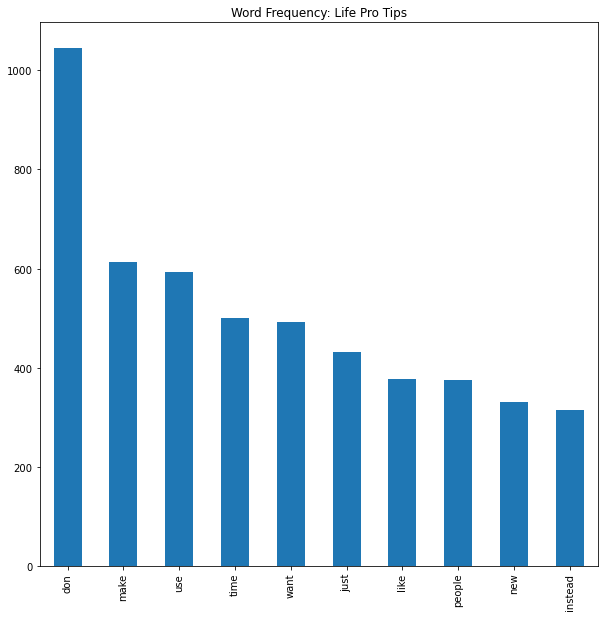

In [7]:
#Ethical first:
plt.figure(figsize = (10, 10))
eth_ti_words_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Word Frequency: Life Pro Tips')
plt.savefig('./images/lpt_freq.png')

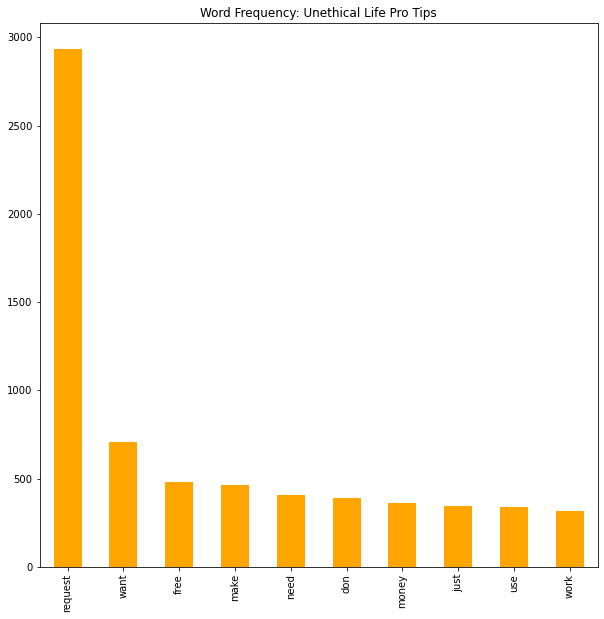

In [8]:
#Unethical Second. I shall keep this color scheme whenever possible to keep continuity throughout the notebook.
plt.figure(figsize=(10, 10))
uneth_ti_words_df.sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Word Frequency: Unethical Life Pro Tips')
plt.savefig('./images/ulpt_freq.png')

This is interesting. The most prevalent word in the unethical dataframe is request... in fact about 40% of the 
posts are requests for unethical life pro tips. Is it more ethical to request unethical life pro tips, or to provide
them?  
Since ethics is the understanding of the intent of a person's actions, I think it is OK to keep the word request in
the text, since it explains their intent is to obtain something. I should probably do an analysis without this word 
however, as this probably adds significant weight to that one particular word. And if I want this model to work on 
other types of text, I might not want to rely on finding the word 'request'.
Also interesting is the appearance of words that have to do with value and work. 'Free', 'money', and 'work' are in 
top 10 words. Other important things to note is 'want' and 'need' appearing in ULPT, and 'want' in LPT. My guess is
these are from the phrases 'If you want...' or 'If you need...'

-----

Maybe the length of the titles or posts will give a clue. Perhaps unethical tipsters tend to be more verbose to get their point across?

In [9]:
#Let's check the length of the titles, and of the post text to see if there are any clues there:
title_word_counts = []
text_word_counts=[]
for i in full_raw.index:
    #print(i)
    #print(len(full_raw.iloc[i]['title'].split()))
    title_word_counts.append(len(full_raw.iloc[i]['title'].split()))
    text_word_counts.append(len(full_raw.iloc[i]['selftext'].split()))
full_raw['title_word_count'] = title_word_counts
full_raw['text_word_count'] = text_word_counts

In [10]:
#Checking on what I created:
full_raw[['title_word_count', 'text_word_count']].head()

,title_word_count,text_word_count
0,22,37
1,34,25
2,5,126
3,18,91
4,40,9


In [11]:
#Checking that nothing is funky...
full_raw.head()

,title,selftext,subreddit,title_word_count,text_word_count
0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0,22,37
1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0,34,25
2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0,5,126
3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0,18,91
4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0,40,9


----

Now that I have the counts created, let's see if there are any clues in the values and distribution of the values:

----

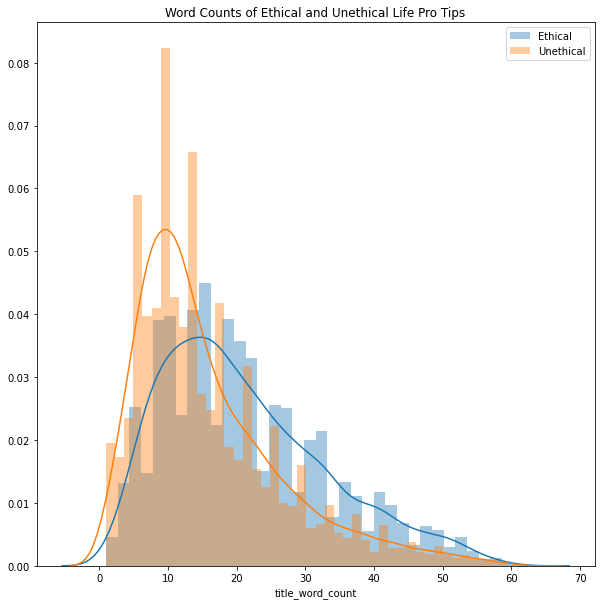

In [12]:
#Let's take a look at the distribution of word counts:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['title_word_count'], label='Ethical')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['title_word_count'], label='Unethical')
plt.title('Word Counts of Ethical and Unethical Life Pro Tips')
plt.legend()

In [13]:
full_raw[full_raw['subreddit'] ==0]['title_word_count'].mean()

21.214493520232743

In [14]:
full_raw[full_raw['subreddit'] ==1]['title_word_count'].mean()

15.860776805251641

In [15]:
full_raw[full_raw['subreddit'] ==0]['title_word_count'].std()

12.034832900821351

In [16]:
full_raw[full_raw['subreddit'] ==1]['title_word_count'].std()

10.77971234149916

### Hypothesis:  A longer title indicates a higher likelihood of being an ethical post.

----

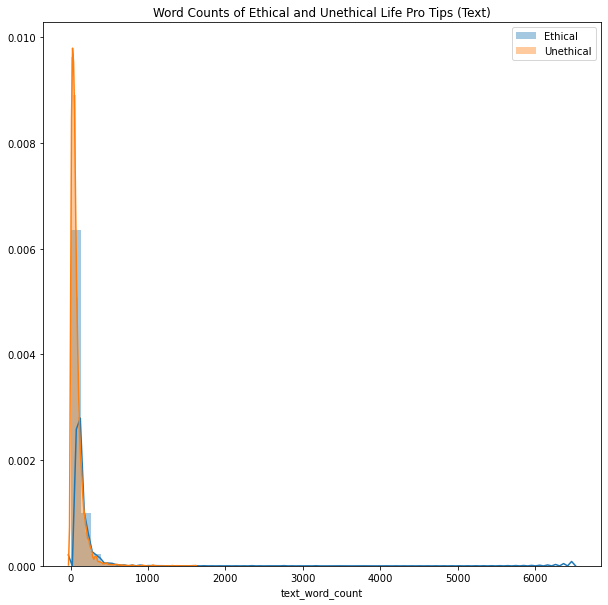

In [17]:
#Let's take a look at the distribution of word counts:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['text_word_count'], label='Ethical')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['text_word_count'], label='Unethical')
plt.title('Word Counts of Ethical and Unethical Life Pro Tips (Text)')
plt.legend()

Once again, a more verbose text body seems to correlate with an ethical post, though I suspect there are some outliers messing with our data out there.

In [18]:
full_raw[full_raw['subreddit'] ==0]['text_word_count'].mean()

88.199021422904

In [19]:
full_raw[full_raw['subreddit'] ==1]['text_word_count'].mean()

76.22647702407002

In [20]:
full_raw[full_raw['subreddit'] ==0]['text_word_count'].std()

141.21052478332908

In [21]:
full_raw[full_raw['subreddit'] ==1]['text_word_count'].std()

89.35187147066117

In [22]:
full_raw[full_raw['subreddit'] ==0]['text_word_count'].max()

6489

In [23]:
full_raw[full_raw['subreddit'] ==1]['text_word_count'].max()

1601

It appears the longer the title and text, the higher probability we have of an ethical protip.

----

Now, we are going to look at the polarities and subjectivities of our two distinct subreddits, and see if there are any indicators that may clue us in to which subreddit has certain characteristics. Polarity can potentially tell us if the posts skew postive or negative, and the subjectivity of the post may indicate if the advice given is an objective piece of advice or if it is expressing an opinion. 

----

In [24]:
polarities = [TextBlob(full_raw.iloc[i, 1]).sentiment[0] for i in range(len(full_raw))]
subjectivities = [TextBlob(full_raw.iloc[i, 1]).sentiment[1] for i in range(len(full_raw))]

In [25]:
#Take a look and see what is stored inside the polarities matrix:
polarities[:3]

[0.22000000000000003, 0.25, 0.24665404040404046]

In [26]:
#Assigning the values to a column in our dataframe. We can potentially use this with modeling later:
full_raw['polarity'] = polarities
full_raw['subjectivity'] = subjectivities
full_raw.head()

,title,selftext,subreddit,title_word_count,text_word_count,polarity,subjectivity
0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0,22,37,0.220000,0.460000
1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0,34,25,0.250000,0.250000
2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0,5,126,0.246654,0.662843
3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0,18,91,0.185714,0.548413
4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0,40,9,0.000000,0.142857


----

Let's graph the ethical vs. unethical polarity vs. subjectivity:

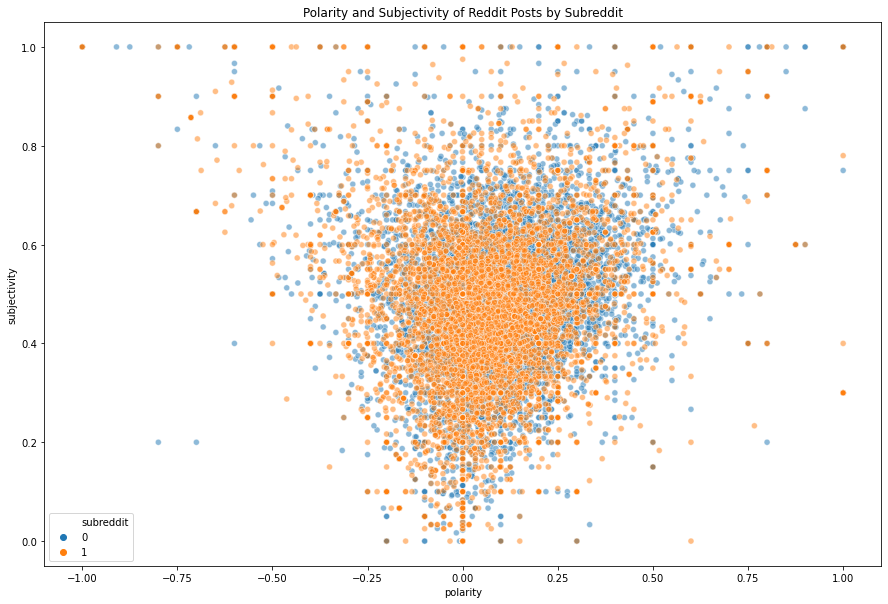

In [27]:
plt.figure(figsize=(15, 10))
sns.scatterplot(full_raw['polarity'], full_raw['subjectivity'], hue=full_raw['subreddit'], alpha=0.5, legend='full')
plt.title('Polarity and Subjectivity of Reddit Posts by Subreddit')
plt.savefig('./images/pol_sub.png')

In [30]:
#As expected, we see a sort of funnel shape, as post titles without much subjective nature cannot skew more positive or negative. Interestingly the ethical posts appear
#to be slightly more subjective and trending positively, while the unethical post titles appear to stick closer to the center. The unethical posts appear to skew
#positively as well however. I will analyze below further:

And now, the subjectivity and polarity comparisons between the two subreddits:

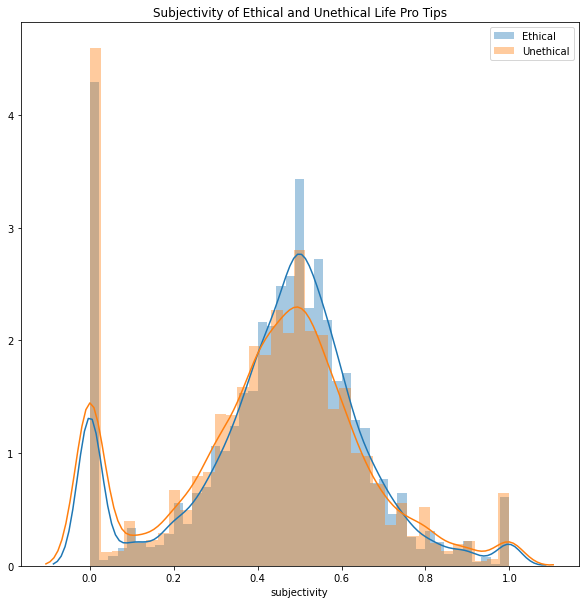

In [33]:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['subjectivity'], label='Ethical')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['subjectivity'], label='Unethical')
plt.title('Subjectivity of Ethical and Unethical Life Pro Tips')
plt.legend()

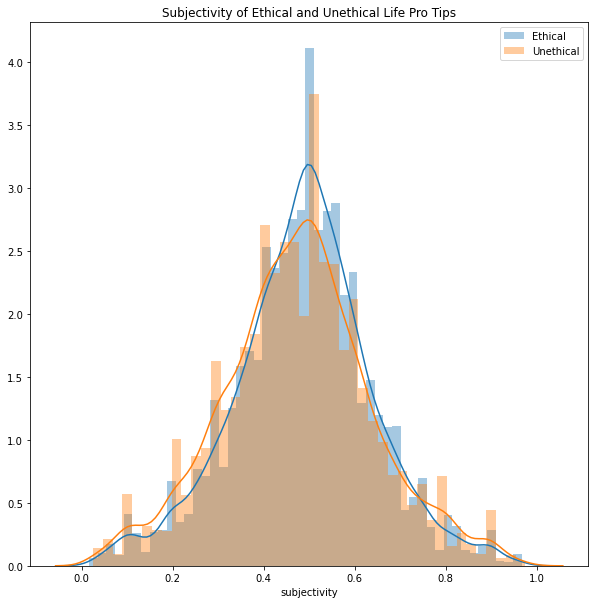

In [34]:
#Looks like we have a few that arent getting captured correctly. Let's see if we exclude the 0s and 1s what happens:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0) & (full_raw['subjectivity'] !=0) & (full_raw['subjectivity'] !=1)]['subjectivity'], label='Ethical')
sns.distplot(full_raw[(full_raw['subreddit']==1) & (full_raw['subjectivity'] !=0) & (full_raw['subjectivity'] !=1)]['subjectivity'], label='Unethical')
plt.title('Subjectivity of Ethical and Unethical Life Pro Tips')
plt.legend()

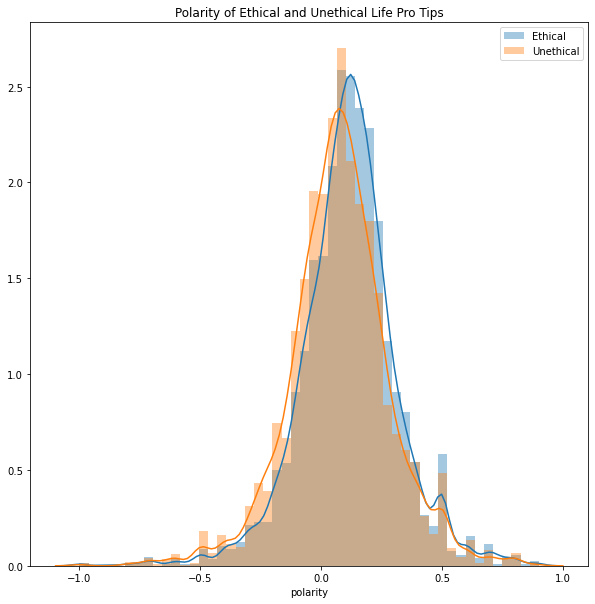

In [35]:
#Let's try polarity:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0) & (full_raw['polarity'] !=0) & (full_raw['polarity'] !=1)]['polarity'], label = 'Ethical')
sns.distplot(full_raw[(full_raw['subreddit']==1) & (full_raw['polarity'] !=0) & (full_raw['polarity'] !=1)]['polarity'], label = 'Unethical')
plt.title('Polarity of Ethical and Unethical Life Pro Tips')
plt.legend()


Very interesting. It appears we can detect that the ethical posts skew more towards the positive side, while the unethical ones are centered closer to 0. The unethical
posts appear more frequent with negative polarities as well.

In [36]:
#Let's see if there is any indication of whats going on in the basic stats about ethical vs. unethical:
#Ethical:
full_raw[full_raw['subreddit'] ==0]['polarity'].mean()

0.10299342313349193

In [37]:
#Unethical:
full_raw[full_raw['subreddit'] ==1]['polarity'].mean()

0.06629513635969814

In [38]:
full_raw[full_raw['subreddit'] ==0]['subjectivity'].mean()

0.4472809846377027

In [39]:
full_raw[full_raw['subreddit'] ==1]['subjectivity'].mean()

0.4248084931440412

In [40]:
#How about checking to see if the scores are more spread out?
full_raw[full_raw['subreddit'] ==0]['polarity'].std()

0.19810269399197014

In [41]:
full_raw[full_raw['subreddit'] ==1]['polarity'].std()

0.2005754747246969

In [42]:
full_raw[full_raw['subreddit'] ==0]['subjectivity'].std()

0.21264240528482975

In [43]:
full_raw[full_raw['subreddit'] ==1]['subjectivity'].std()

0.23163343799131322

It appears that the unethical life pro tips are less polarized, but more spread out in terms of their polarization.   
Subjectivity of the two different subreddits appears to be very similar, with the unethical again showing more spread
in subjectivity.
Both ethical and unethical tips skew positive, but the ethical protips trend more positive in polarity than the unethical ones.

----

Finally, I will investigate the post sentiment a bit further, with vader sentiment analyzer. This analyzer can detect the sentiment and intensity of a body of text, and divides it into 3 categories: Negative, Neutral, and Positive sentiment. It also returns a combined score. I am going to graph these three sentiments, and perhaps compare the sentiment levels individually, for the ethical and unethical subreddits' posts' titles and text.

In [45]:
analyzer = SentimentIntensityAnalyzer()

In [46]:
full_raw.reset_index(inplace=True)
#First declare the list where I will store my scores:
title_scores=[]
#And a list of indexes to drop, in case the sentiment analyzer does not work (I encountered some errors the first few times I tried to run this)
indexes_to_drop = []

#Loop over the whole df:
for i in range(len(full_raw)):
    try: #Try to find the sentiment scores
        title_scores.append(analyzer.polarity_scores(full_raw['title'][i]))
    except: #Otherwise add a nan and record the dropping index
        title_scores.append(np.nan)
        indexes_to_drop.append(i)
        
#Doing the same for text as we did for the titles:
text_scores=[]

for i in range(len(full_raw)):
    try:
        text_scores.append(analyzer.polarity_scores(full_raw['selftext'][i]))
    except:
        text_scores.append(np.nan)
        if i in indexes_to_drop: #If the index is already in the ones to drop, don't add it
            pass
        else:
            indexes_to_drop.append(i)

In [47]:
#let's take a look:
title_scores[:3]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.06, 'neu': 0.874, 'pos': 0.066, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.6522}]

In [48]:
text_scores[:3]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.4215},
 {'neg': 0.101, 'neu': 0.642, 'pos': 0.257, 'compound': 0.968}]

In [49]:
indexes_to_drop[:3]

[]

In [50]:
len(indexes_to_drop)

0

In [51]:
#Ok no indexes to drop, that was weird, the first time I ran it it needed it. That's ok. Moving on.

In [52]:
#Adding the scores to our dataframe:
full_raw['title_scores'] = title_scores
full_raw['text_scores'] = text_scores
full_raw.head()

,index,title,selftext,subreddit,title_word_count,text_word_count,polarity,subjectivity,title_scores,text_scores
0,0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0,22,37,0.220000,0.460000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0,34,25,0.250000,0.250000,"{'neg': 0.06, 'neu': 0.874, 'pos': 0.066, 'com...","{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp..."
2,2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0,5,126,0.246654,0.662843,"{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compou...","{'neg': 0.101, 'neu': 0.642, 'pos': 0.257, 'co..."
3,3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0,18,91,0.185714,0.548413,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...","{'neg': 0.036, 'neu': 0.898, 'pos': 0.066, 'co..."
4,4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0,40,9,0.000000,0.142857,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...","{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp..."


---

Next I thought it might be neat to graph the sentiment scores, and see if there was anything I could discern. Since we have three continuous variables, I decided to try and do this in 3D.

In [53]:
#Going to try and graph these points in 3D:
from mpl_toolkits import mplot3d

In [54]:
#Getting our three title vectors, so we can graph them later:
title_neg=[]
title_neu=[]
title_pos=[]
title_comp=[]
for i in full_raw.index:
    title_neg.append(full_raw['title_scores'][i]['neg'])
    title_neu.append(full_raw['title_scores'][i]['neu'])
    title_pos.append(full_raw['title_scores'][i]['pos'])
    title_comp.append(full_raw['title_scores'][i]['compound'])

In [55]:
#Same for text:
text_neg=[]
text_neu=[]
text_pos=[]
text_comp=[]
for i in full_raw.index:
    text_neg.append(full_raw['text_scores'][i]['neg'])
    text_neu.append(full_raw['text_scores'][i]['neu'])
    text_pos.append(full_raw['text_scores'][i]['pos'])
    text_comp.append(full_raw['text_scores'][i]['compound'])

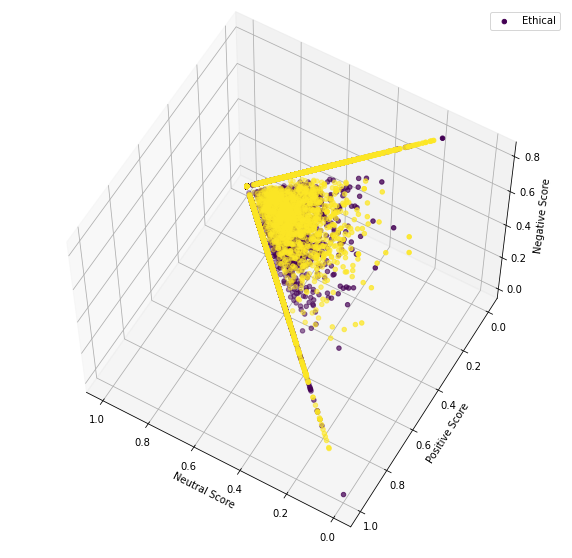

In [57]:
#Attempting a 3D plot to see if any insights come out of ethical vs. unethical post titles:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Just redefining our data as X, Y, Z to be easier to understand
X, Y, Z = title_neu, title_pos, title_neg
ax.scatter3D(X, Y, Z, c=full_raw['subreddit'])

ax.view_init(elev = 60, azim=120)
ax.set_xlabel('Neutral Score')
ax.set_ylabel('Positive Score')
ax.set_zlabel('Negative Score')
plt.legend(labels=['Ethical', 'Unethical'])
plt.savefig('./images/title_3D_sentiment.png')

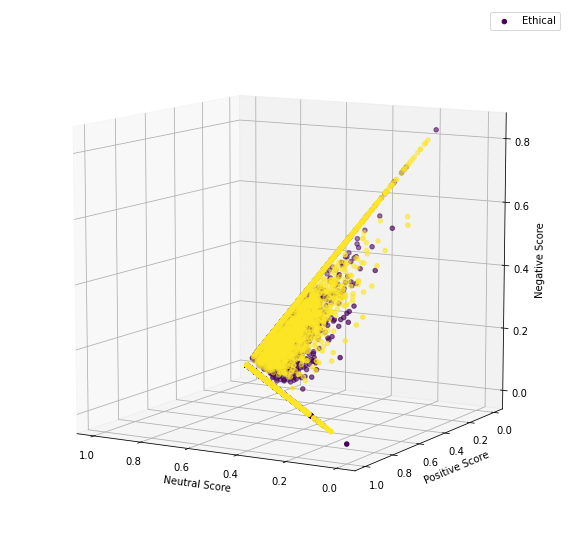

In [58]:
#Same figure from a different angle:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Just redefining our data as X, Y, Z to be easier to understand
X, Y, Z = title_neu, title_pos, title_neg
ax.scatter3D(X, Y, Z, c=full_raw['subreddit'])

ax.view_init(elev = 10, azim=120)
ax.set_xlabel('Neutral Score')
ax.set_ylabel('Positive Score')
ax.set_zlabel('Negative Score')
plt.legend(labels=['Ethical', 'Unethical'])
plt.savefig('./images/title_3D_sentiment_view_2.png')

Interesting. As the Neutral score approaches 1, the positive and negative scores appear to head towards zero. This seems to indicate that we can't have a highly positive and negative score on the same text. The majority of the points appear to exist in the moderate neutral and positive scores, with a low negative score.  
To be honest I was hoping for a more exciting graph, or at least some more separation between the classes. Maybe detailed analysis by individual score will tell me more.  
I am going to add the data to our dataframe, as it may come in handy later, and analyze these separately:

In [59]:
#Add the scores in to the dataframe so we can analyze them separately:
full_raw['title_neg'] = title_neg
full_raw['title_neu'] = title_neu
full_raw['title_pos'] = title_pos
full_raw['title_comp'] = title_comp
#For text too:
full_raw['text_neg'] = title_neg
full_raw['text_neu'] = title_neu
full_raw['text_pos'] = title_pos
full_raw['text_comp'] = title_comp

Just to double check nothing weird or special is going on, I will look at the ethical and unethical distributions separately:

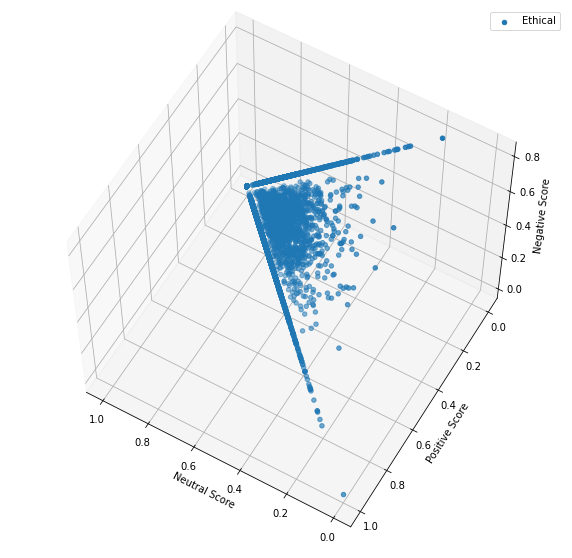

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Just redefining our data as X, Y, Z to be easier to understand
X, Y, Z = full_raw[full_raw['subreddit']==0]['title_neu'], full_raw[full_raw['subreddit']==0]['title_pos'], full_raw[full_raw['subreddit']==0]['title_neg']
ax.scatter3D(X, Y, Z)

ax.view_init(elev = 60, azim=120)
ax.set_xlabel('Neutral Score')
ax.set_ylabel('Positive Score')
ax.set_zlabel('Negative Score')
plt.legend(labels=['Ethical'])
plt.savefig('./images/ethical_3D_sentiment.png')

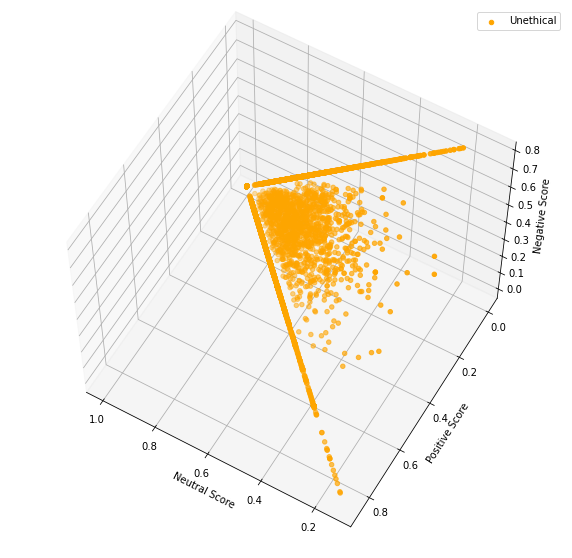

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Just redefining our data as X, Y, Z to be easier to understand
X, Y, Z = full_raw[full_raw['subreddit']==1]['title_neu'], full_raw[full_raw['subreddit']==1]['title_pos'], full_raw[full_raw['subreddit']==1]['title_neg']
ax.scatter3D(X, Y, Z, color='orange')

ax.view_init(elev = 60, azim=120)
ax.set_xlabel('Neutral Score')
ax.set_ylabel('Positive Score')
ax.set_zlabel('Negative Score')
plt.legend(labels=['Unethical'])
plt.savefig('./images/unethical_3D_sentiment.png')

It almost looks as though the ethical values hug the line in the positive direction, while the unethical sentiment values tend more towards the middle. This matches with our polarity/subjectivity analysis in indicating that the ethical protips tend to be more positive than the unethical ones.

In [62]:
#Maybe if I had time I would throw a widget in to manipulate the 3D graph on its axes.

---

Ok, so we looked at them in 3D. Let's see what we can tell just by looking at the distributions of the sentiments:

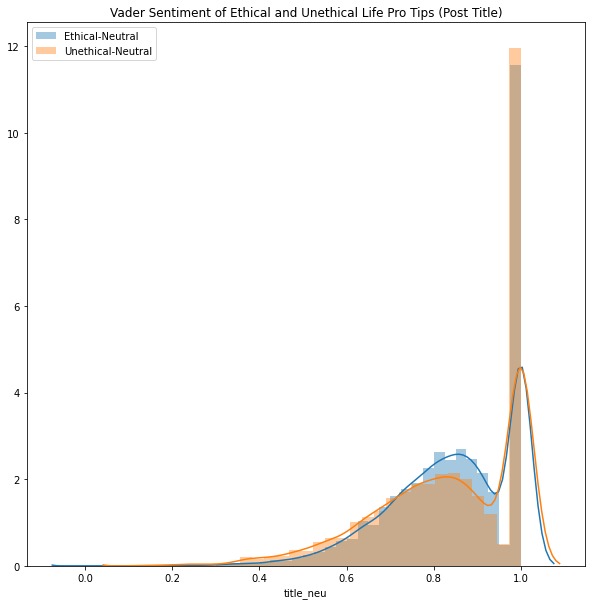

In [64]:
#Let's graph sentiment distribution: (Title Neutral Sentiment)
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['title_neu'], label = 'Ethical-Neutral')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['title_neu'], label = 'Unethical-Neutral')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips (Post Title)')
plt.legend()

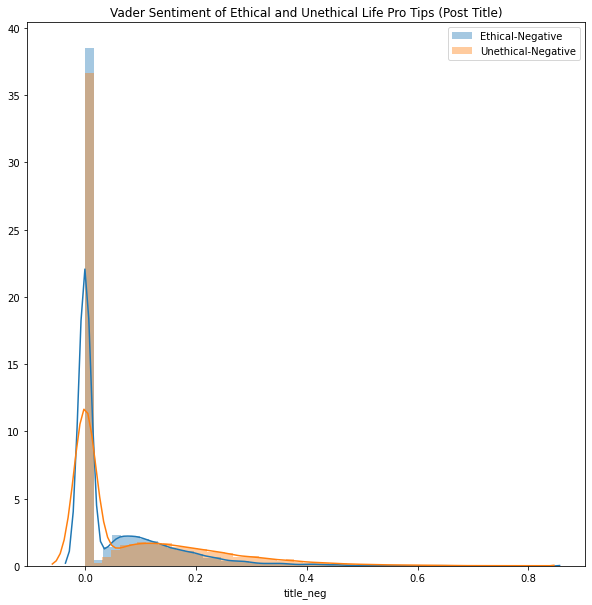

In [65]:
#Negative
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['title_neg'], label = 'Ethical-Negative')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['title_neg'], label = 'Unethical-Negative')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips (Post Title)')
plt.legend()

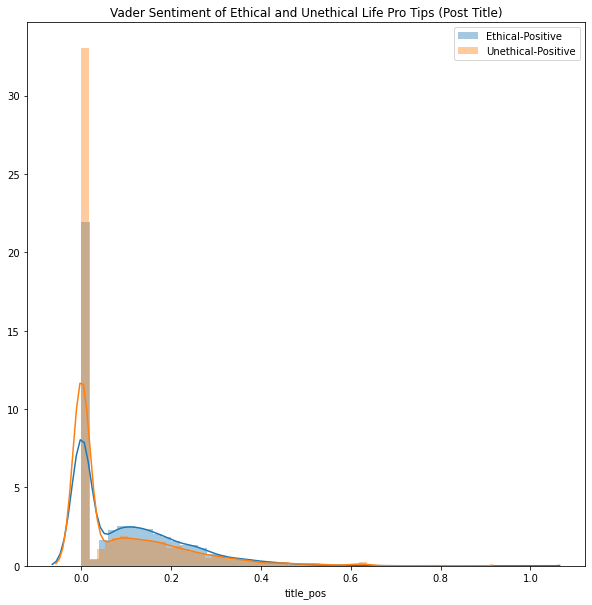

In [66]:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['title_pos'], label = 'Ethical-Positive')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['title_pos'], label = 'Unethical-Positive')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips (Post Title)')
plt.legend()

Analyzing the above 3 graphs:
Both ethical and unethical posts have a high # of neutral sentiment. This is most likely due to the fact that the protips are meant to be advice, and presented in an 
essentially neutral manner - even unethical life pro tips has a rule about not being rude with the posts.  
It appears however that you can see the ethical tips have a higher concentration of '0' scores on the negative, and the unethical have a higher concentration of '0' 
scores on the positive, leading us to believe that the two subreddits may be separated by whether they have a stronger negative or positive sentiment.  
Let's look at the combined score:

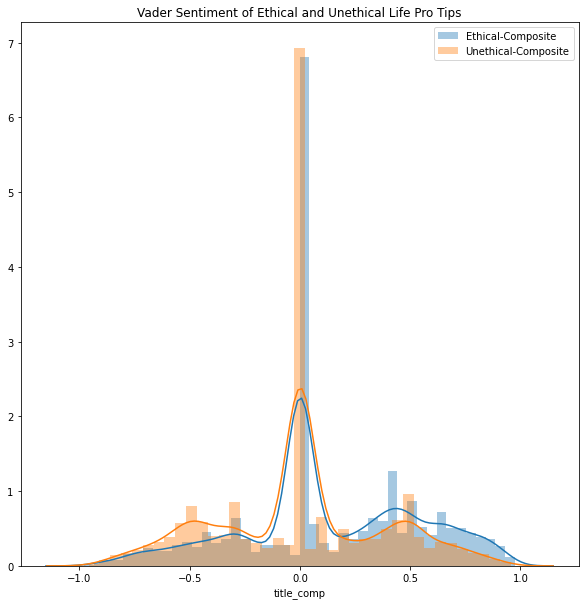

In [67]:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['title_comp'], label = 'Ethical-Composite')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['title_comp'], label = 'Unethical-Composite')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips')
plt.legend()

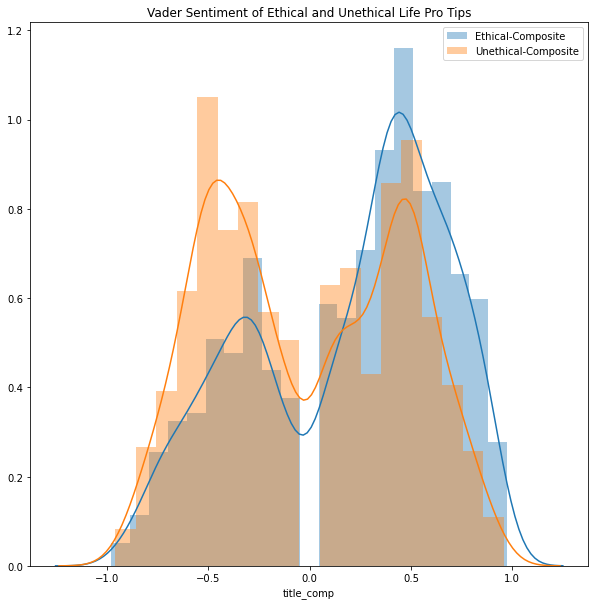

In [68]:
#Wow this is pretty cool. Looks like we can clearly see the unethical posts skew towards the negative sentiment side, and the ethical towards the positive. Let's see
#what happens when we pull the neutral ones out:
#Threshold value to allow for some variation of essentially fully neutral sentiment:
threshold = .05

plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0) & ((full_raw['title_comp']>threshold) |(full_raw['title_comp']< -threshold))]['title_comp'], label = 'Ethical-Composite')
sns.distplot(full_raw[(full_raw['subreddit']==1) & ((full_raw['title_comp']>threshold) |(full_raw['title_comp']< -threshold))]['title_comp'], label = 'Unethical-Composite')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips')
plt.legend()
plt.savefig('./images/vader_sent_title_comp.png')

Ok, so we have done about all we can do with the post title.

Now to do some graphing and analysis for post text:

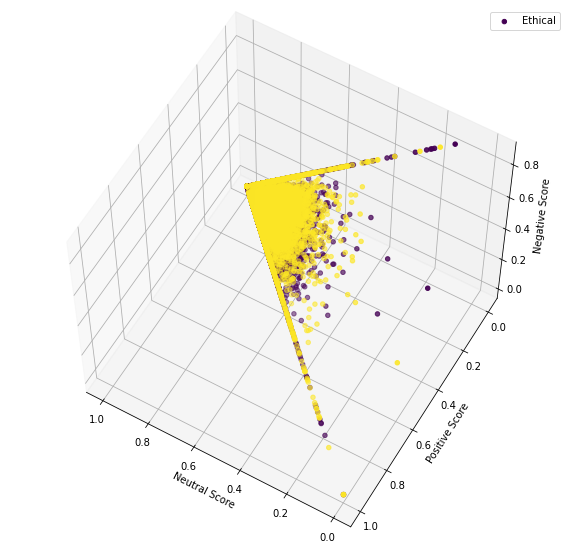

In [69]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Just redefining our data as X, Y, Z to be easier to understand
X, Y, Z = text_neu, text_pos, text_neg
ax.scatter3D(X, Y, Z, c=full_raw['subreddit'])

ax.view_init(elev = 60, azim=120)
ax.set_xlabel('Neutral Score')
ax.set_ylabel('Positive Score')
ax.set_zlabel('Negative Score')
plt.legend(labels=['Ethical', 'Unethical'])

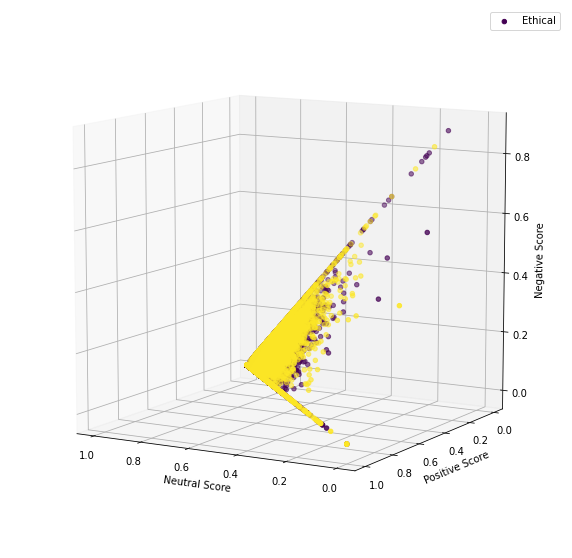

In [70]:
#Same figure from a different angle:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Just redefining our data as X, Y, Z to be easier to understand
X, Y, Z = text_neu, text_pos, text_neg
ax.scatter3D(X, Y, Z, c=full_raw['subreddit'])

ax.view_init(elev = 10, azim=120)
ax.set_xlabel('Neutral Score')
ax.set_ylabel('Positive Score')
ax.set_zlabel('Negative Score')
plt.legend(labels=['Ethical', 'Unethical'])

We see the same triangle shape and approximate distribution of ethical and unethical post texts.

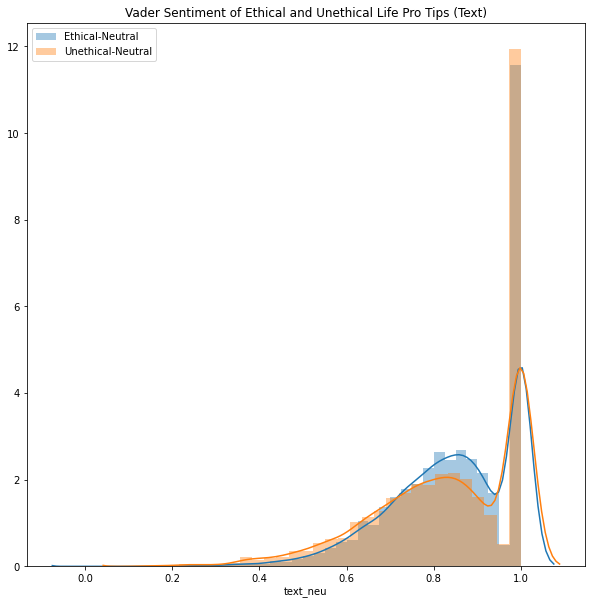

In [71]:
#Let's graph sentiment distribution: (for text this time)
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['text_neu'], label = 'Ethical-Neutral')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['text_neu'], label = 'Unethical-Neutral')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips (Text)')
plt.legend()

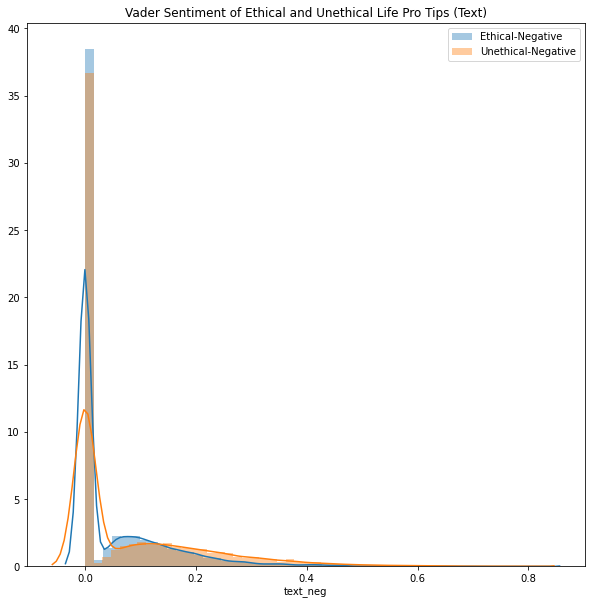

In [72]:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['text_neg'], label = 'Ethical-Negative')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['text_neg'], label = 'Unethical-Negative')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips (Text)')
plt.legend()

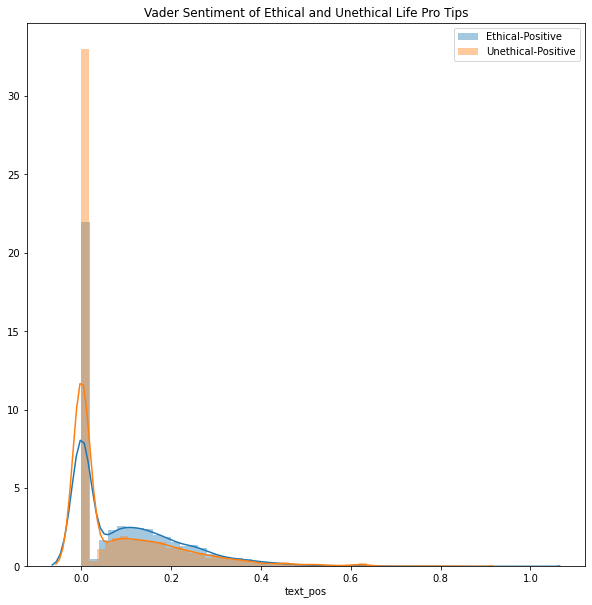

In [73]:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['text_pos'], label = 'Ethical-Positive')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['text_pos'], label = 'Unethical-Positive')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips')
plt.legend()

Again in the three plots above we see a similar trend: Ethical protips have fewer '0' positive scores, and unethical protips have fewer '0' negative scores.

### Hypothesis: Ethical Protip Posts will have tend to have a more positive sentiment than Unethical Protip Posts.

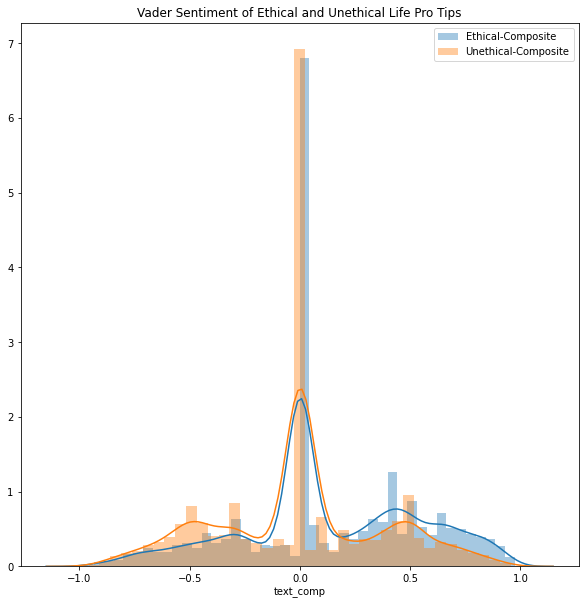

In [74]:
plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0)]['text_comp'], label = 'Ethical-Composite')
sns.distplot(full_raw[(full_raw['subreddit']==1)]['text_comp'], label = 'Unethical-Composite')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips')
plt.legend()

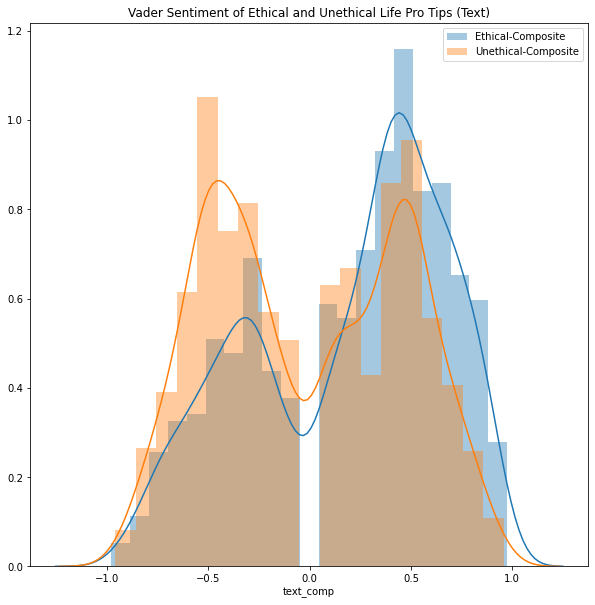

In [75]:
#Threshold value to allow for some variation of essentially fully neutral sentiment:
threshold = .05

plt.figure(figsize=(10, 10))
sns.distplot(full_raw[(full_raw['subreddit']==0) & ((full_raw['text_comp']>threshold) |(full_raw['text_comp']< -threshold))]['text_comp'], label = 'Ethical-Composite')
sns.distplot(full_raw[(full_raw['subreddit']==1) & ((full_raw['text_comp']>threshold) |(full_raw['text_comp']< -threshold))]['text_comp'], label = 'Unethical-Composite')
plt.title('Vader Sentiment of Ethical and Unethical Life Pro Tips (Text)')
plt.legend()

We see a similar sentiment distribution in the text of the posts. Ethical posts tend towards a positive composite score and Unethical posts tend towards a negative 
composite score. There also appear to be localized peaks of both unethical and ethical tips as you approach -0.5 and 0.5 respectively, seeming to indicate that the 
posts that are not very close to neutral overall tend to shift away from neutral significantly - rather than see a steady increase to the middle or a normal distribution as we might expect of sentiment scores overall, it appears that the scores form their own somewhat normal distribution around the 'middle' of the negative side and the 'middle' of the positive side. 

---

---

This concludes my exploratory data analysis. Key findings:
1. Words associated with ethical tips are common 'advice' words seem to be associated with helping or finding alternatives to common practices. 
2. Words associated with unethical tips have to do with deriving value and getting something - requesting, needing, money, free, and work are all in the top words.
3. Mean word count and mean post text length appear to be a characteristic able to discern between ethical and unethical tips. The longer the title or post, the higher probability we have of an ethical protip post.
4. Unethical posts appear to be more tightly clustered compared to ethical posts when looking at subjectivity and polarity. Subjectivity of unethical posts appears to have a greater standard deviation, and the polarity of ethical posts tends to be a bit more positive.
5. Sentiment Analysis reveals that ethical posts tend to have more positive sentiment, and unethical posts more negative sentiment. The vast majority of posts appear to have neutral sentiment, possibly due to the lack of ability for the sentiment analyzer to infer intent (It can understand positive and negative words and punctuation, but neutral words applied in a mean or condescending way still get interpreted as neutral).

---

---

In [76]:
#Preparing the dataframe for export, so I can model with it:

In [77]:
full_raw.head()

,index,title,selftext,subreddit,title_word_count,text_word_count,polarity,subjectivity,title_scores,text_scores,title_neg,title_neu,title_pos,title_comp,text_neg,text_neu,text_pos,text_comp
0,0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0,22,37,0.220000,0.460000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
1,1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0,34,25,0.250000,0.250000,"{'neg': 0.06, 'neu': 0.874, 'pos': 0.066, 'com...","{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.060,0.874,0.066,0.0516,0.060,0.874,0.066,0.0516
2,2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0,5,126,0.246654,0.662843,"{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compou...","{'neg': 0.101, 'neu': 0.642, 'pos': 0.257, 'co...",0.000,0.360,0.640,0.6522,0.000,0.360,0.640,0.6522
3,3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0,18,91,0.185714,0.548413,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...","{'neg': 0.036, 'neu': 0.898, 'pos': 0.066, 'co...",0.101,0.899,0.000,-0.2263,0.101,0.899,0.000,-0.2263
4,4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0,40,9,0.000000,0.142857,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...","{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",0.000,0.892,0.108,0.5574,0.000,0.892,0.108,0.5574


In [78]:
full_raw.drop('index', axis=1, inplace=True)
full_raw.head()

,title,selftext,subreddit,title_word_count,text_word_count,polarity,subjectivity,title_scores,text_scores,title_neg,title_neu,title_pos,title_comp,text_neg,text_neu,text_pos,text_comp
0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",0,22,37,0.220000,0.460000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,0,34,25,0.250000,0.250000,"{'neg': 0.06, 'neu': 0.874, 'pos': 0.066, 'com...","{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.060,0.874,0.066,0.0516,0.060,0.874,0.066,0.0516
2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",0,5,126,0.246654,0.662843,"{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compou...","{'neg': 0.101, 'neu': 0.642, 'pos': 0.257, 'co...",0.000,0.360,0.640,0.6522,0.000,0.360,0.640,0.6522
3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,0,18,91,0.185714,0.548413,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...","{'neg': 0.036, 'neu': 0.898, 'pos': 0.066, 'co...",0.101,0.899,0.000,-0.2263,0.101,0.899,0.000,-0.2263
4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,0,40,9,0.000000,0.142857,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...","{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",0.000,0.892,0.108,0.5574,0.000,0.892,0.108,0.5574


In [79]:
#make a target variable and drop subreddit. We can always rename it later:
full_raw['target'] = full_raw['subreddit']
full_raw.drop('subreddit', axis=1, inplace=True)
full_raw.head()

,title,selftext,title_word_count,text_word_count,polarity,subjectivity,title_scores,text_scores,title_neg,title_neu,title_pos,title_comp,text_neg,text_neu,text_pos,text_comp,target
0,": when packing for a move, use your clothes to...","most people will unpack the kitchen early on, ...",22,37,0.220000,0.460000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0
1,: to avoid giving clicks/views to clickbaity n...,most of the time it will give you the name of ...,34,25,0.250000,0.250000,"{'neg': 0.06, 'neu': 0.874, 'pos': 0.066, 'com...","{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.060,0.874,0.066,0.0516,0.060,0.874,0.066,0.0516,0
2,: kindness is not weakness.,"before i go on, i hope this doesn’t get taken ...",5,126,0.246654,0.662843,"{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compou...","{'neg': 0.101, 'neu': 0.642, 'pos': 0.257, 'co...",0.000,0.360,0.640,0.6522,0.000,0.360,0.640,0.6522,0
3,: bought online and shipping delayed? check gu...,for example- i ordered several times from newe...,18,91,0.185714,0.548413,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...","{'neg': 0.036, 'neu': 0.898, 'pos': 0.066, 'co...",0.101,0.899,0.000,-0.2263,0.101,0.899,0.000,-0.2263,0
4,": guys, if you are on a date with a girl, shut...",(if physical attraction and all that is there ...,40,9,0.000000,0.142857,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...","{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",0.000,0.892,0.108,0.5574,0.000,0.892,0.108,0.5574,0


In [80]:
full_raw.to_csv('./data/full_raw_scores.csv')

Please move on to Notebook 04_Modeling.ipynb

In [81]:
##End